In [1]:
#generic import and constant definition list
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import h5py
import astropy.constants as cons
from matplotlib.colors import LogNorm
import astropy.units as u
import pandas as pd
import scipy.optimize as opt
#all of the important fundamental constants are put into cgs units just for convenience
c=cons.c.cgs.value
G=cons.G.cgs.value
h=cons.h.cgs.value
hbar=cons.hbar.cgs.value
Msun=cons.M_sun.cgs.value
Rsun=cons.R_sun.cgs.value
Rearth=cons.R_earth.cgs.value
mp=cons.m_p.cgs.value
me=cons.m_e.cgs.value
mn=cons.m_n.cgs.value
kB=cons.k_B.cgs.value
mu_e=2 #mean mass per electron for He-core or C/O core composition
m_u = 1/cons.N_A.cgs.value #atomic mass unit in grams

$$ m - M = 5\log_{10}(\frac{d_L}{M_{pc}}) + 25 $$

$$d_L \approx cH_0^{-1} \left( z + 1/2(1-q_0)z^2\right) $$




We want to perform least-squares so we should make this all into a matrix,

\begin{equation}
\begin{pmatrix}
  \Sigma \frac{x_i^2}{\sigma_i^2} & \Sigma \frac{x_i}{\sigma_i^2}\\
  \Sigma \frac{x_i}{\sigma_i^2} & \Sigma \frac{1}{\sigma_i^2}\\
\end{pmatrix}
\begin{pmatrix}
  a \\
  b \\
\end{pmatrix}
=
\begin{pmatrix}
  \Sigma \frac{d_i x_i}{\sigma_i^2} \\
  \Sigma \frac{d_i}{\sigma_i^2} \\
\end{pmatrix}
\end{equation}
where a and b have the relationship 

\begin{equation}
m-M = a \log_{10}(z) + b
\end{equation}

To find a and b then the code goes through and basically just treats it as a matrix inversion problem with 
\begin{equation}
\begin{pmatrix}
  a \\
  b \\
\end{pmatrix} = \left( \begin{pmatrix}
  \Sigma \frac{x_i^2}{\sigma_i^2} & \Sigma \frac{x_i}{\sigma_i^2}\\
  \Sigma \frac{x_i}{\sigma_i^2} & \Sigma \frac{1}{\sigma_i^2}\\
\end{pmatrix}\right)^{-1} \begin{pmatrix}
  \Sigma \frac{d_i x_i}{\sigma_i^2} \\
  \Sigma \frac{d_i}{\sigma_i^2} \\
\end{pmatrix}
\end{equation}

\begin{equation}
\left(\frac{cH_0^{-1} \left( z + 1/2(1-q_0)z^2\right) }{M_{pc}}\right)^5(25) = 10^{a\log_{10}(z) + b} 


\end{equation}

\begin{equation}
\left(\frac{cH_0^{-1}}{M_{pc}}\right)^5(25) = 10^{b} \Rightarrow H_0 = \left(\frac{10^b M_{pc}}{25c^5}\right)^{-1/5}

\end{equation}

\begin{equation}
z^a =\left( z + 1/2(1-q_0)z^2\right)^5 \Rightarrow  q_0= -2(z^{a/5} -z)z^{-2} +1
\end{equation}

In [ ]:
data = pd.read_csv('supernovae_data.txt',header=None,delimiter='\t',names=['name','z','m-M', 'error','NA'])
print(data.head())

## Using a linear least squares approach with np.linalg.lstsq to fit the data

In [ ]:
M = np.vstack([np.log10(data['z']),np.ones(len(data['z']))]).T
results = np.linalg.lstsq(M,data['m-M'])

/home/tegan/anaconda3/envs/research/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [36]:
a,b = results[0] #gives the slope and intercept of the best fit line

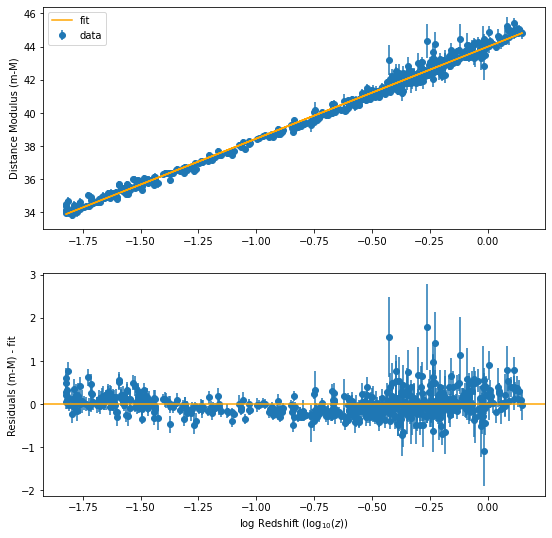

In [37]:
fig,ax = plt.subplots(2,1,figsize=(9,9))
ax[0].errorbar(np.log10(data['z']),data['m-M'],data['error'],fmt='o',label='data',zorder=1)
predicted = a*np.log10(data['z']) + b

ax[0].plot(np.log10(data['z']),predicted,color='orange',label='fit')
ax[0].set_ylabel('Distance Modulus (m-M)')
ax[0].legend()
ax[1].errorbar(np.log10(data['z']),data['m-M']-predicted,data['error'],fmt='o',label='data - fit',zorder=1)
ax[1].axhline(0,color='orange')
ax[1].set_xlabel('log Redshift ($\log_{10}(z)$)')
ax[1].set_ylabel('Residuals (m-M) - fit')
plt.show()

In [ ]:
q_0 = -2*(data['z']**(a/5)-data['z'])*(data['z']**(-2)) + 1

In [39]:
h_0 = ((10**b)/(25*c**5))**(-1/5)

In [42]:
np.average(q_0)

8.40309818414453

In [41]:
h_0

1.3383418287335956e-07